In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!tar -xvf /content/drive/My\ Drive/yelp_dataset.tar

business.json
checkin.json
review.json
tip.json
user.json
photo.json
Dataset_Challenge_Dataset_Agreement.pdf
Yelp_Dataset_Challenge_Round_13.pdf


In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
business = pd.read_json('business.json',lines=True)

In [5]:
business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."


In [0]:
business = business[['business_id','postal_code','stars','review_count','is_open','categories']]

In [0]:
business = business[~business['categories'].isna()]

In [0]:
business = business[business['categories'].str.contains('Restaurants')]

In [9]:
business.head(2)

,business_id,postal_code,stars,review_count,is_open,categories
1,QXAEGFB4oINsVuTFxEYKFQ,L5R 3E7,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,28210,4.0,170,1,"Sushi Bars, Restaurants, Japanese"


In [0]:
user1 = pd.read_json('user.json',lines=True,chunksize=1000000)

In [0]:
user = pd.DataFrame()

In [0]:
for record in user1:
    user = user.append(pd.DataFrame(record))

In [0]:
user = user[['user_id','review_count','elite','fans']]

In [0]:
review = pd.read_json('review.json',lines=True,chunksize=1000000)

In [0]:
review1 = pd.DataFrame()

In [0]:
for record in review:
    review1 = review1.append(pd.DataFrame(record))

In [0]:
review1 = review1[['review_id','user_id','business_id','stars']]

In [0]:
user_review = pd.merge(review1,user,how='left',on='user_id')

In [19]:
user_review.head()

,review_id,user_id,business_id,stars,review_count,elite,fans
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,10,,0
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,68,2009,3
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,10,,1
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,4,,0
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,2,,0


In [0]:
user_review['elite_user'] = np.where(user_review['elite'] != '',1,0)

In [0]:
user_review = user_review.drop(['review_id','elite'],axis=1)

In [0]:
user_review = user_review.groupby(['business_id','elite_user']).agg({'user_id':'count','stars':'mean','review_count':'sum','fans':'sum'})

In [0]:
user_review = user_review.rename(columns={'user_id':'reviews'})

In [0]:
user_review = user_review.reset_index()

In [25]:
user_review.head()

,business_id,elite_user,reviews,stars,review_count,fans
0,--1UhMGODdWsrMastO9DZw,0,21,4.000000,446,9
1,--1UhMGODdWsrMastO9DZw,1,5,4.400000,1021,38
2,--6MefnULPED_I942VcFNA,0,22,2.636364,1618,48
3,--6MefnULPED_I942VcFNA,1,24,3.666667,12567,1968
4,--7zmmkVg-IMGaXbuVd0SQ,0,33,3.909091,592,17


In [0]:
user_review = pd.pivot_table(user_review,values = ['reviews','stars','review_count','fans'],index='business_id',columns='elite_user')

In [27]:
user_review.head()

fans         review_count  ... reviews     stars          
elite_user                 0       1            0  ...       1         0         1
business_id                                        ...                            
--1UhMGODdWsrMastO9DZw   9.0    38.0        446.0  ...     5.0  4.000000  4.400000
--6MefnULPED_I942VcFNA  48.0  1968.0       1618.0  ...    24.0  2.636364  3.666667
--7zmmkVg-IMGaXbuVd0SQ  17.0  1150.0        592.0  ...    26.0  3.909091  3.884615
--8LPVSo5i0Oo61X01sV9A   2.0     NaN         30.0  ...     NaN  3.500000       NaN
--9QQLMTbFzLJ_oT-ON3Xw   8.0     5.0        328.0  ...     1.0  3.250000  4.000000

[5 rows x 8 columns]

In [0]:
user_review = user_review.reset_index()

In [0]:
user_review.columns = ['business_id','Non_elite_fans','elite_fans','Non_elite_total_reviews','elite_total_reviews','Non_elite_rest_reviews','elite_rest_reviews','Non_elite_rating','elite_rating']

In [30]:
user_review.head()

,business_id,Non_elite_fans,elite_fans,Non_elite_total_reviews,elite_total_reviews,Non_elite_rest_reviews,elite_rest_reviews,Non_elite_rating,elite_rating
0,--1UhMGODdWsrMastO9DZw,9.0,38.0,446.0,1021.0,21.0,5.0,4.000000,4.400000
1,--6MefnULPED_I942VcFNA,48.0,1968.0,1618.0,12567.0,22.0,24.0,2.636364,3.666667
2,--7zmmkVg-IMGaXbuVd0SQ,17.0,1150.0,592.0,11518.0,33.0,26.0,3.909091,3.884615
3,--8LPVSo5i0Oo61X01sV9A,2.0,NaN,30.0,NaN,4.0,NaN,3.500000,NaN
4,--9QQLMTbFzLJ_oT-ON3Xw,8.0,5.0,328.0,139.0,12.0,1.0,3.250000,4.000000


In [0]:
checkin = pd.read_json('checkin.json',lines=True)

In [32]:
checkin.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [0]:
checkin['date'] = checkin['date'].str.split(',').tolist()

In [0]:
checkin = checkin.explode('date')

In [0]:
checkin['date'] = pd.to_datetime(checkin['date'])
checkin['year'] = pd.DatetimeIndex(checkin['date']).year

In [36]:
checkin.head()

,business_id,date,year
0,--1UhMGODdWsrMastO9DZw,2016-04-26 19:49:16,2016
0,--1UhMGODdWsrMastO9DZw,2016-08-30 18:36:57,2016
0,--1UhMGODdWsrMastO9DZw,2016-10-15 02:45:18,2016
0,--1UhMGODdWsrMastO9DZw,2016-11-18 01:54:50,2016
0,--1UhMGODdWsrMastO9DZw,2017-04-20 18:39:06,2017


In [0]:
checkin = checkin.groupby(['business_id','year']).count().reset_index()

In [0]:
checkin = checkin.groupby('business_id').mean().reset_index()

In [39]:
checkin.head()

,business_id,year,date
0,--1UhMGODdWsrMastO9DZw,2016.5,3.000000
1,--6MefnULPED_I942VcFNA,2014.5,20.875000
2,--7zmmkVg-IMGaXbuVd0SQ,2016.0,36.000000
3,--8LPVSo5i0Oo61X01sV9A,2016.0,1.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,2014.0,4.111111


In [0]:
checkin = checkin.rename(columns={'date':'avg_checkins_peryear'})

In [0]:
checkin = checkin.drop('year',axis=1)

In [42]:
checkin.head()

,business_id,avg_checkins_peryear
0,--1UhMGODdWsrMastO9DZw,3.000000
1,--6MefnULPED_I942VcFNA,20.875000
2,--7zmmkVg-IMGaXbuVd0SQ,36.000000
3,--8LPVSo5i0Oo61X01sV9A,1.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,4.111111


In [0]:
restaurants_postal = business[business['postal_code'].notnull()]

In [44]:
restaurants_postal.head()

,business_id,postal_code,stars,review_count,is_open,categories
1,QXAEGFB4oINsVuTFxEYKFQ,L5R 3E7,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,28210,4.0,170,1,"Sushi Bars, Restaurants, Japanese"
11,1Dfx3zM-rW4n-31KeC8sJg,85016,3.0,18,1,"Restaurants, Breakfast & Brunch, Mexican, Taco..."
13,fweCYi8FmbJXHCqLnwuk8w,44060,4.0,16,1,"Italian, Restaurants, Pizza, Chicken Wings"
17,PZ-LZzSlhSe9utkQYU8pFg,89119,4.0,40,0,"Restaurants, Italian"


In [0]:
restaurants_postal = restaurants_postal.groupby(['postal_code'])['business_id'].count()

In [0]:
restaurants_postal = restaurants_postal.reset_index()

In [0]:
restaurants_postal = restaurants_postal.rename(columns={'business_id':'total_restaurants'})

In [48]:
restaurants_postal.head()

,postal_code,total_restaurants
0,,102
1,05440,1
2,12919,5
3,12958,1
4,12979,6


In [0]:
photo = pd.read_json('photo.json',lines=True)

In [0]:
photo = photo.groupby(['business_id','label'])['photo_id'].count()

In [0]:
photo = photo.reset_index()

In [52]:
photo.head()

,business_id,label,photo_id
0,--6MefnULPED_I942VcFNA,food,3
1,--9e1ONYQuAa-CB_Rrw7Tw,drink,5
2,--9e1ONYQuAa-CB_Rrw7Tw,food,59
3,--9e1ONYQuAa-CB_Rrw7Tw,inside,7
4,--9e1ONYQuAa-CB_Rrw7Tw,menu,1


In [0]:
photo = photo.pivot(index='business_id',columns='label',values='photo_id')

In [54]:
photo.head()

label,drink,food,inside,menu,outside
business_id,,,,,
--6MefnULPED_I942VcFNA,NaN,3.0,NaN,NaN,NaN
--9e1ONYQuAa-CB_Rrw7Tw,5.0,59.0,7.0,1.0,2.0
--DaPTJW3-tB1vP-PfdTEg,NaN,NaN,NaN,NaN,1.0
--FBCX-N37CMYDfs790Bnw,NaN,1.0,NaN,NaN,NaN
--KCl2FvVQpvjzmZSPyviA,NaN,2.0,NaN,NaN,NaN


In [0]:
photo = photo.replace(np.nan,0)

In [0]:
photo = photo.reset_index()

In [57]:
photo.head()

label,business_id,drink,food,inside,menu,outside
0,--6MefnULPED_I942VcFNA,0.0,3.0,0.0,0.0,0.0
1,--9e1ONYQuAa-CB_Rrw7Tw,5.0,59.0,7.0,1.0,2.0
2,--DaPTJW3-tB1vP-PfdTEg,0.0,0.0,0.0,0.0,1.0
3,--FBCX-N37CMYDfs790Bnw,0.0,1.0,0.0,0.0,0.0
4,--KCl2FvVQpvjzmZSPyviA,0.0,2.0,0.0,0.0,0.0


Need to merge all the datasets together with the main business file

1) user_review

2) restaurants_postal

3) checkin

4) photo

In [0]:
final = pd.merge(business, restaurants_postal, how='left',on='postal_code')

In [0]:
final = pd.merge(final,user_review,how='left',on='business_id')

In [0]:
final = pd.merge(final,checkin,how='left',on='business_id')

In [0]:
final = pd.merge(final,photo,how='left',on='business_id')

In [62]:
final.head()

,business_id,postal_code,stars,review_count,is_open,categories,total_restaurants,Non_elite_fans,elite_fans,Non_elite_total_reviews,elite_total_reviews,Non_elite_rest_reviews,elite_rest_reviews,Non_elite_rating,elite_rating,avg_checkins_peryear,drink,food,inside,menu,outside
0,QXAEGFB4oINsVuTFxEYKFQ,L5R 3E7,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",6,37.0,1654.0,2287.0,16991.0,72.0,62.0,2.444444,3.080645,50.555556,0.0,1.0,1.0,0.0,1.0
1,gnKjwL_1w79qoiV3IC_xQQ,28210,4.0,170,1,"Sushi Bars, Restaurants, Japanese",88,119.0,1072.0,4428.0,12168.0,135.0,43.0,4.140741,3.860465,80.111111,0.0,6.0,2.0,0.0,0.0
2,1Dfx3zM-rW4n-31KeC8sJg,85016,3.0,18,1,"Restaurants, Breakfast & Brunch, Mexican, Taco...",294,78.0,167.0,1152.0,920.0,15.0,4.0,2.600000,4.000000,10.000000,NaN,NaN,NaN,NaN,NaN
3,fweCYi8FmbJXHCqLnwuk8w,44060,4.0,16,1,"Italian, Restaurants, Pizza, Chicken Wings",199,6.0,232.0,255.0,883.0,15.0,3.0,4.533333,3.333333,1.666667,NaN,NaN,NaN,NaN,NaN
4,PZ-LZzSlhSe9utkQYU8pFg,89119,4.0,40,0,"Restaurants, Italian",470,165.0,301.0,3436.0,4646.0,31.0,10.0,3.967742,4.500000,8.500000,0.0,0.0,1.0,0.0,1.0


In [0]:
final2 = final.drop(['business_id','postal_code','categories'],axis=1)

In [0]:
values = {'drink': 0, 'food': 0, 'inside': 0, 'menu': 0,'outside': 0,'Non_elite_fans':0,'elite_fans':0,'Non_elite_total_reviews':0,'elite_total_reviews':0, 'Non_elite_rest_reviews':0, 'elite_rest_reviews':0,'avg_checkins_peryear':0}
final2 = final2.fillna(value=values)

In [65]:
final2.describe()

,stars,review_count,is_open,total_restaurants,Non_elite_fans,elite_fans,Non_elite_total_reviews,elite_total_reviews,Non_elite_rest_reviews,elite_rest_reviews,Non_elite_rating,elite_rating,avg_checkins_peryear,drink,food,inside,menu,outside
count,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,5.937100e+04,59371.000000,59371.000000,58947.000000,54463.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000
mean,3.441790,68.456452,0.711408,106.555979,80.445807,791.995250,2110.114467,6.793487e+03,52.515824,18.254148,3.404865,3.565957,32.346721,0.287379,1.927658,0.825133,0.050008,0.182985
std,0.803304,176.636132,0.453112,157.568255,276.481661,2894.959626,6620.529497,2.260784e+04,133.974232,52.624538,0.908476,0.770053,108.533152,1.246594,6.514746,3.541126,0.374002,0.820099
min,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7.000000,0.000000,5.000000,3.000000,30.000000,134.000000,4.670000e+02,5.000000,2.000000,2.846154,3.087596,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,21.000000,1.000000,55.000000,14.000000,151.000000,510.000000,1.805000e+03,15.000000,5.000000,3.500000,3.666667,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,62.000000,1.000000,136.000000,56.000000,675.000000,1723.500000,6.228500e+03,47.000000,16.000000,4.050000,4.000000,24.250000,0.000000,2.000000,1.000000,0.000000,0.000000
max,5.000000,8348.000000,1.000000,965.000000,13130.000000,140212.000000,341940.000000,1.118966e+06,6005.000000,2707.000000,5.000000,5.000000,7655.400000,55.000000,590.000000,327.000000,32.000000,61.000000


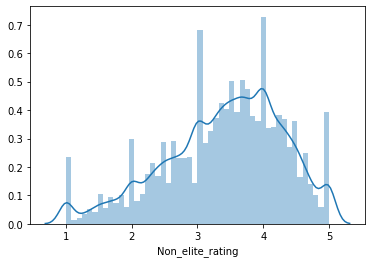

In [66]:
sns.distplot(final2['Non_elite_rating'])

In [0]:
final2.loc[final2['Non_elite_rating'].isna(),'Non_elite_rating'] = final2['Non_elite_rating'].mean()

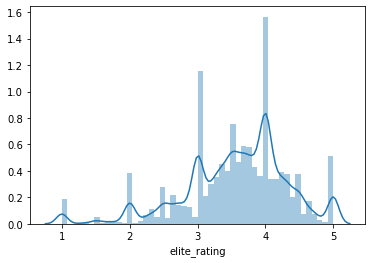

In [68]:
sns.distplot(final2['elite_rating'])

In [0]:
final2.loc[final2['elite_rating'].isna(),'elite_rating']= final2['elite_rating'].mean()

In [70]:
final2.describe()

,stars,review_count,is_open,total_restaurants,Non_elite_fans,elite_fans,Non_elite_total_reviews,elite_total_reviews,Non_elite_rest_reviews,elite_rest_reviews,Non_elite_rating,elite_rating,avg_checkins_peryear,drink,food,inside,menu,outside
count,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,5.937100e+04,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000
mean,3.441790,68.456452,0.711408,106.555979,80.445807,791.995250,2110.114467,6.793487e+03,52.515824,18.254148,3.404865,3.565957,32.346721,0.287379,1.927658,0.825133,0.050008,0.182985
std,0.803304,176.636132,0.453112,157.568255,276.481661,2894.959626,6620.529497,2.260784e+04,133.974232,52.624538,0.905226,0.737537,108.533152,1.246594,6.514746,3.541126,0.374002,0.820099
min,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7.000000,0.000000,5.000000,3.000000,30.000000,134.000000,4.670000e+02,5.000000,2.000000,2.857143,3.181818,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,21.000000,1.000000,55.000000,14.000000,151.000000,510.000000,1.805000e+03,15.000000,5.000000,3.500000,3.578947,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,62.000000,1.000000,136.000000,56.000000,675.000000,1723.500000,6.228500e+03,47.000000,16.000000,4.044346,4.000000,24.250000,0.000000,2.000000,1.000000,0.000000,0.000000
max,5.000000,8348.000000,1.000000,965.000000,13130.000000,140212.000000,341940.000000,1.118966e+06,6005.000000,2707.000000,5.000000,5.000000,7655.400000,55.000000,590.000000,327.000000,32.000000,61.000000


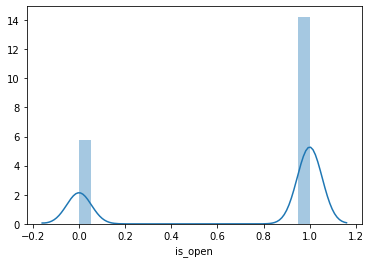

In [71]:
sns.distplot(final2['is_open'])

In [0]:
Y = final2['is_open']
X = final2.drop('is_open',axis=1)

In [0]:
Y = pd.DataFrame(Y)

In [0]:
Y.loc[Y['is_open']==1,'is_closed'] = 0
Y.loc[Y['is_open']==0,'is_closed'] = 1

In [0]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score,auc
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score,classification_report

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y['is_closed'], test_size=0.1, random_state=42)


Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

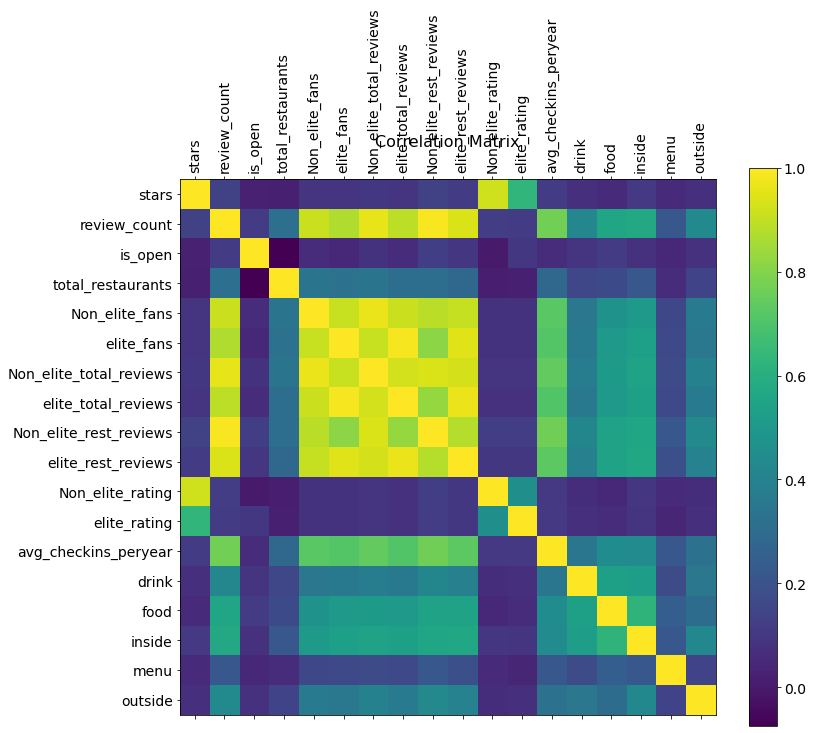

In [77]:
f = plt.figure(figsize=(12, 10))
plt.matshow(final2.corr(), fignum=f.number)
plt.xticks(range(final2.shape[1]), final2.columns, fontsize=14, rotation=90)
plt.yticks(range(final2.shape[1]), final2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [0]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score,auc
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score,classification_report
import numpy as np
from sklearn import neighbors
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from xgboost import XGBClassifier

In [79]:
# knn

param_grid_k = [{'n_neighbors': range(1,21),'weights': ["uniform", "distance"]}]

knn_clf = neighbors.KNeighborsClassifier()

k_clf = GridSearchCV(estimator=knn_clf, param_grid=param_grid_k, cv=3, n_jobs=-1,scoring='accuracy')
k_clf.fit(X_train_scaled, Y_train)
print('KNN best parameters: ',k_clf.best_params_)
print('KNN best score: ', k_clf.best_score_)

KNN best parameters:  {'n_neighbors': 20, 'weights': 'uniform'}
KNN best score:  0.7258435798102297
Logistic best parameters:  {'C': 14, 'penalty': 'l2'}
Logistic best score:  0.7209402429210413


              precision    recall  f1-score   support

           0       0.75      0.94      0.83      4219
           1       0.60      0.21      0.31      1719

    accuracy                           0.73      5938
   macro avg       0.67      0.58      0.57      5938
weighted avg       0.70      0.73      0.68      5938

Accuracy: 0.7310542270124621
Precision: 0.7041400778352597
Recall: 0.7310542270124621
F score: 0.6810231988878612


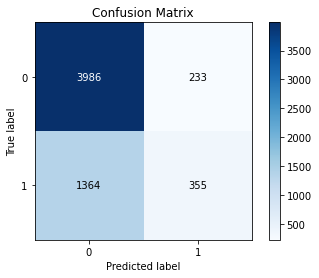

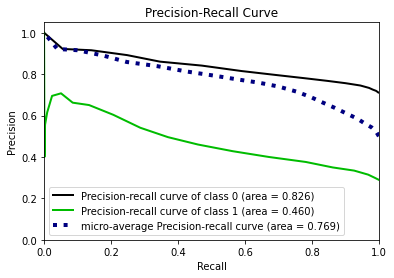

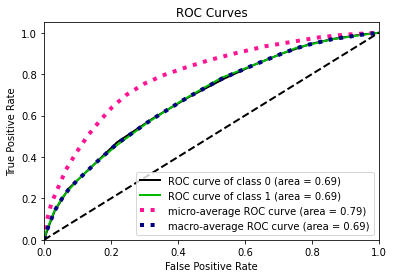

In [96]:
k_clf = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')
y_pred = k_clf.fit(X_train_scaled, Y_train).predict(X_test_scaled)
y_probas = k_clf.predict_proba(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)
skplt.metrics.plot_roc(Y_test, y_probas)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [0]:
# logit

param_grid_l = [{'C': range(1,20),'penalty': ['l1', 'l2']}]

Logit_clf = linear_model.LogisticRegression()

l_clf = GridSearchCV(estimator=Logit_clf, param_grid=param_grid_l, cv=3,n_jobs=-1,scoring="accuracy")
l_clf.fit(X_train_scaled, Y_train)
print('Logistic best parameters: ',l_clf.best_params_)
print('Logistic best score: ',l_clf.best_score_)

              precision    recall  f1-score   support

           0       0.73      0.98      0.83      4219
           1       0.64      0.10      0.17      1719

    accuracy                           0.72      5938
   macro avg       0.68      0.54      0.50      5938
weighted avg       0.70      0.72      0.64      5938

Accuracy: 0.7226338834624453
Precision: 0.700271327727329
Recall: 0.7226338834624453
F score: 0.6414919930355427


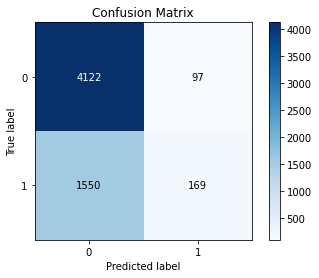

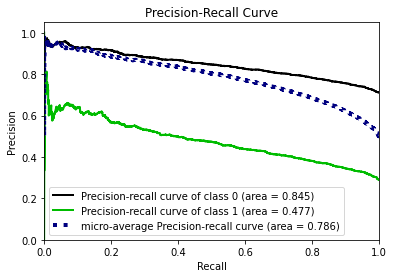

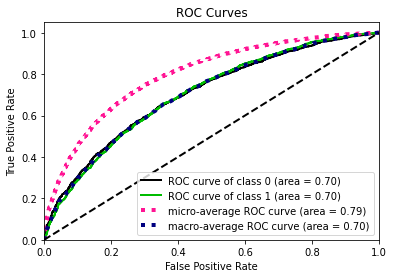

In [97]:
l_clf = linear_model.LogisticRegression(C=14, penalty= 'l2')
y_pred = l_clf.fit(X_train_scaled, Y_train).predict(X_test_scaled)
y_probas = l_clf.predict_proba(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)
skplt.metrics.plot_roc(Y_test, y_probas)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [93]:
# Decision Tree
param_grid_t = [{'max_depth': range(1,20), 'min_samples_split': range(2,20)}]

tree_clf = DecisionTreeClassifier()

    # tree
d_clf = GridSearchCV(estimator=tree_clf, param_grid=param_grid_t,n_jobs = -1, cv=3,scoring="accuracy")
d_clf.fit(X_train, Y_train)
print('Decision Tree best parameters: ', d_clf.best_params_)
print('Decision Tree best score: ',d_clf.best_score_)

Decision Tree best parameters:  {'max_depth': 7, 'min_samples_split': 17}
Decision Tree best score:  0.7325997043025846


              precision    recall  f1-score   support

           0       0.75      0.91      0.82      4219
           1       0.55      0.26      0.36      1719

    accuracy                           0.72      5938
   macro avg       0.65      0.59      0.59      5938
weighted avg       0.69      0.72      0.69      5938

Accuracy: 0.7246547659144493
Precision: 0.6942583866702966
Recall: 0.7246547659144493
F score: 0.68940365957544


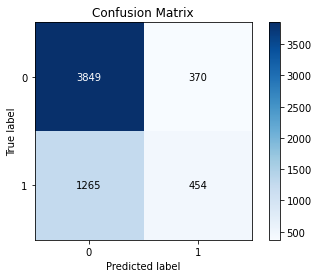

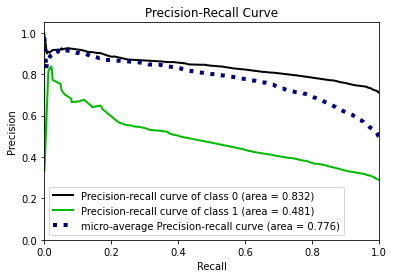

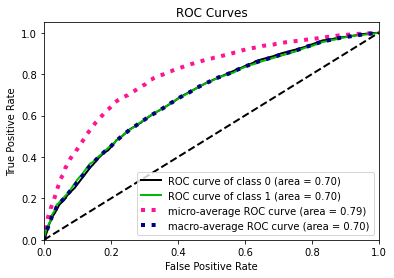

In [122]:
d_clf = DecisionTreeClassifier(max_depth=7, min_samples_split=17)
y_pred = d_clf.fit(X_train_scaled, Y_train).predict(X_test_scaled)
y_probas = d_clf.predict_proba(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)
skplt.metrics.plot_roc(Y_test, y_probas)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [98]:
# Random Forrest

param_grid_RF = [{'n_estimators': [500,750,1000], 'max_depth': range(1,10), 'min_samples_split': range(2,7)}]

enm_RF = ensemble.RandomForestClassifier()

clf = GridSearchCV(estimator=enm_RF, param_grid=param_grid_RF, cv=3, n_jobs=-1,scoring='accuracy')
clf.fit(X_train, Y_train)
print('Random Forrest best parameters: ',clf.best_params_)
print('Random Forrest best score: ',clf.best_score_)

Random Forrest best parameters:  {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 500}
Random Forrest best score:  0.7511462953605449


              precision    recall  f1-score   support

           0       0.75      0.97      0.84      4219
           1       0.72      0.20      0.32      1719

    accuracy                           0.75      5938
   macro avg       0.74      0.59      0.58      5938
weighted avg       0.74      0.75      0.69      5938

Accuracy: 0.7468844728864937
Precision: 0.7417110915669803
Recall: 0.7468844728864937
F score: 0.6919379052302012


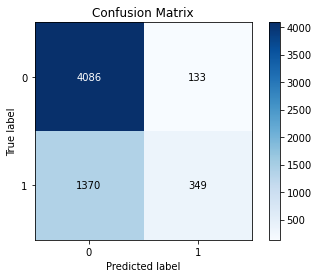

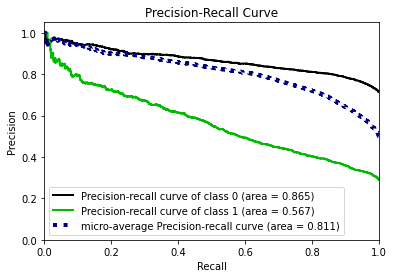

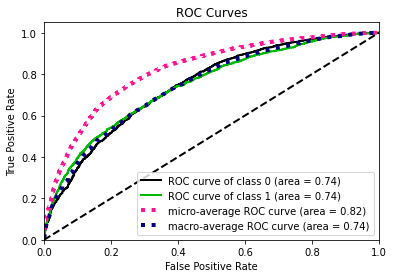

In [99]:
RF_clf = ensemble.RandomForestClassifier(max_depth = 9,min_samples_split=2,n_estimators=500)
y_pred = RF_clf.fit(X_train, Y_train).predict(X_test)
y_probas = RF_clf.predict_proba(X_test)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)
skplt.metrics.plot_roc(Y_test, y_probas)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [0]:
feature_importance = zip(X_train.columns,RF_clf.feature_importances_)
feature_importance = pd.DataFrame(feature_importance, columns = ['feature','importance'])
feature_importance = feature_importance.sort_values(by='importance')

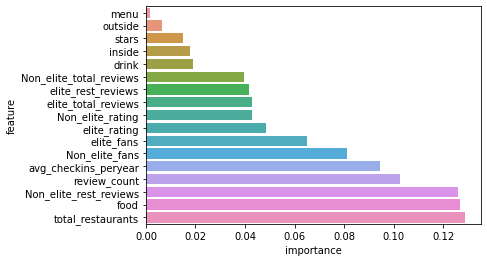

In [102]:
sns.barplot(data = feature_importance, x='importance',y='feature')

In [105]:
# xgboost

param_grid_XGB = {'n_estimators':[750,1000],'learning_rate':[0.001,0.01,0.1,0.2],'max_depth':[1,2,3,4,5,6]}

xgb2 = XGBClassifier(objective='binary:logistic',random_state=42)


    # XGBoost
xgb_clf = GridSearchCV(estimator=xgb2, param_grid=param_grid_XGB, cv=3, n_jobs=-1,scoring='accuracy')
xgb_clf.fit(X_train, Y_train)
print('XGBoost best parameters: ',xgb_clf.best_params_)
print('XGBoost best score: ',xgb_clf.best_score_)

XGBoost best parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 750}
XGBoost best score:  0.7665113319484215


              precision    recall  f1-score   support

           0       0.79      0.92      0.85      4219
           1       0.67      0.39      0.49      1719

    accuracy                           0.77      5938
   macro avg       0.73      0.65      0.67      5938
weighted avg       0.75      0.77      0.75      5938

Accuracy: 0.7681037386325362
Precision: 0.7541094735218522
Recall: 0.7681037386325362
F score: 0.7458656256750451


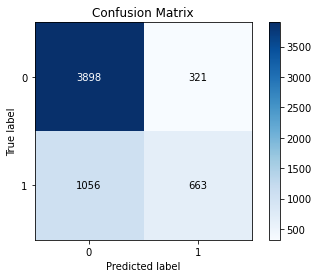

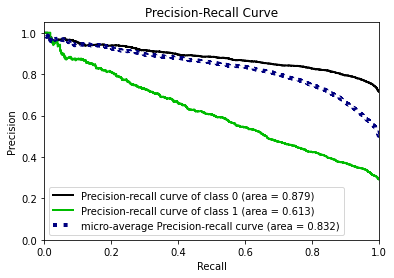

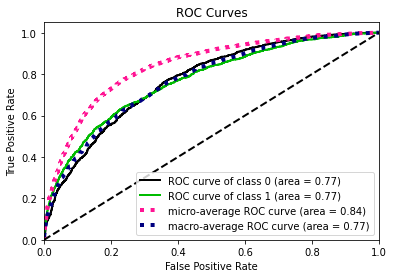

In [106]:
xgb_clf = XGBClassifier(objective='binary:logistic', max_depth = 4,learning_rate=0.1,n_estimators=750)
y_pred = xgb_clf.fit(X_train, Y_train).predict(X_test)
y_probas = xgb_clf.predict_proba(X_test)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)
skplt.metrics.plot_roc(Y_test, y_probas)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

XGBoost is showing the best performance of all the non neural network models. WE can give NN a try just to see if the performance in any way is way more significant that XGBoost

In [109]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=959301206330e706faf841dcba4e6f981ffab1d0ba5f609a9f85869c2263bb9b
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=3a0065bb5b30c9f80ff4e042adf907f19ea323ed7d8635b3bc6a470ad2d64f23
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [110]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping


def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='elu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [0]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='/content/drive/My Drive',
    project_name='rest_tuner')

In [113]:
x, val_x, y, val_y = train_test_split(X_train,Y_train, test_size=0.2, random_state=42)

tuner.search(x, y.values,
             epochs=5,
             validation_data=(val_x, val_y.values))

models = tuner.get_best_models(num_models=1)

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1336/1336 [==============================] - 4s 3ms/step - loss: 0.6006 - accuracy: 0.7092 - val_loss: 0.5941 - val_accuracy: 0.7111
Epoch 2/5
1336/1336 [==============================] - 4s 3ms/step - loss: 0.5901 - accuracy: 0.7128 - val_loss: 0.5886 - val_accuracy: 0.7085
Epoch 3/5
1336/1336 [==============================] - 4s 3ms/step - loss: 0.5759 - accuracy: 0.7141 - val_loss: 0.5912 - val_accuracy: 0.7093
Epoch 4/5
1336/1336 [==============================] - 4s 3ms/step - loss: 0.57

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1336/1336 [==============================] - 9s 6ms/step - loss: 0.6979 - accuracy: 0.7110 - val_loss: 0.6931 - val_accuracy: 0.7089
Epoch 2/5
1336/1336 [==============================] - 8s 6ms/step - loss: 0.6932 - accuracy: 0.7117 - val_loss: 0.6931 - val_accuracy: 0.7089
Epoch 3/5
1336/1336 [==============================] - 8s 6ms/step - loss: 0.6932 - accuracy: 0.7117 - val_loss: 0.6931 - val_accuracy: 0.7089
Epoch 4/5
1336/1336 [==============================] - 8s 6ms/step - loss: 0.69

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1336/1336 [==============================] - 15s 11ms/step - loss: 0.6932 - accuracy: 0.7119 - val_loss: 0.6931 - val_accuracy: 0.7096
Epoch 2/5
1336/1336 [==============================] - 15s 11ms/step - loss: 0.6932 - accuracy: 0.7120 - val_loss: 0.6931 - val_accuracy: 0.7096
Epoch 3/5
1336/1336 [==============================] - 16s 12ms/step - loss: 0.6932 - accuracy: 0.7120 - val_loss: 0.6931 - val_accuracy: 0.7096
Epoch 4/5
1336/1336 [==============================] - 15s 11ms/step - lo

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1336/1336 [==============================] - 10s 7ms/step - loss: 0.6938 - accuracy: 0.6831 - val_loss: 0.6931 - val_accuracy: 0.7096
Epoch 2/5
1336/1336 [==============================] - 9s 7ms/step - loss: 0.6932 - accuracy: 0.7090 - val_loss: 0.6931 - val_accuracy: 0.7061
Epoch 3/5
1336/1336 [==============================] - 9s 7ms/step - loss: 0.6932 - accuracy: 0.7093 - val_loss: 0.6931 - val_accuracy: 0.7067
Epoch 4/5
1336/1336 [==============================] - 9s 7ms/step - loss: 0.6

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1336/1336 [==============================] - 16s 12ms/step - loss: 0.5892 - accuracy: 0.7119 - val_loss: 0.5732 - val_accuracy: 0.7096
Epoch 2/5
1336/1336 [==============================] - 16s 12ms/step - loss: 0.5701 - accuracy: 0.7125 - val_loss: 0.5676 - val_accuracy: 0.7097
Epoch 3/5
1336/1336 [==============================] - 16s 12ms/step - loss: 0.5575 - accuracy: 0.7200 - val_loss: 0.5550 - val_accuracy: 0.7122
Epoch 4/5
1336/1336 [==============================] - 16s 12ms/step - lo

INFO:tensorflow:Oracle triggered exit


In [116]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=5)
History = models[0].fit(X_train, Y_train, validation_split=0.2, batch_size=64,epochs=15, verbose = False,callbacks=[early_stopping_monitor])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [118]:
neural = models[0] 
neural.evaluate(X_train, Y_train,verbose=False)

[0.5270985960960388, 0.7503602504730225]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      4219
           1       0.63      0.28      0.39      1719

    accuracy                           0.74      5938
   macro avg       0.70      0.61      0.61      5938
weighted avg       0.72      0.74      0.71      5938

Accuracy: 0.7441899629504883
Precision: 0.7234531197878954
Recall: 0.7441899629504883
F score: 0.7072865654619269


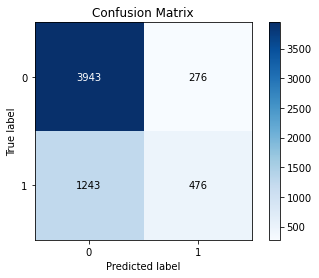

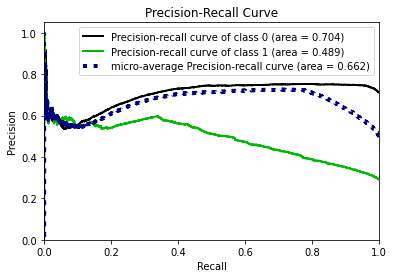

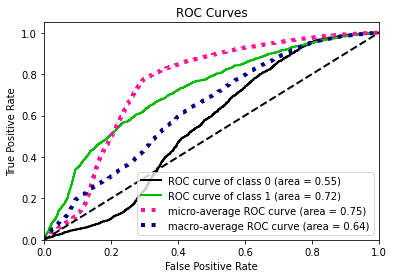

In [124]:
y_pred = neural.predict_classes(X_test)
y_probas = neural.predict_proba(X_test)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)
skplt.metrics.plot_roc(Y_test, y_probas)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

Finally XGBoost is doing a better job at classification for this dataset.